

<img align="left" width="800" src="https://pyimagesearch.com/wp-content/uploads/2018/12/keras_fit_generator_illustration.png">


## Uncomment below cells and run all of them

In [ ]:
 ! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 ! mkdir ~/.kaggle

### From Kaggle website from your account page generate API Token then download and store the kaggle.json file into the same directory of this notebook.

In [ ]:
 ! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

### copy the API command for the dataset you want to download from kaggle dataset page

In [ ]:
 !kaggle datasets download -d andrewmvd/animal-faces

 99% 692M/696M [00:10<00:00, 65.1MB/s]
100% 696M/696M [00:10<00:00, 66.6MB/s]


In [ ]:
 ! unzip animal-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: afhq/train/wild/fl

In [ ]:
import os
cat_len = os.listdir('/content/afhq/train/cat')
dog_len = os.listdir('/content/afhq/train/dog')
wild_len = os.listdir('/content/afhq/train/wild')
print(f'cat_len : {len(cat_len)}, \ndog_len : {len(dog_len)}, \nwild_len : {len(wild_len)}')

cat_len : 5153, 
dog_len : 4739, 
wild_len : 4738


# The keras deep lerning libraries has functions to fit model

1. .fit
2. .fit_generator




# What is difference between keras fit and fit_generator?


Both the functions perform on same task, but how they do it is completely different.

let us disccus each function with example and understand their working.


## fit_geneartor


For small and simple dataset we can use .fit function because the dataset do not require any data augmentation.

However, in real life this is not the case. The dataset we get are often complex and challenging with a large size. Thus is fiting it into the memory is difficult.

The dataset also require to be augmented to prevent overfitting of the model and increase the ability of our model to generalize



In those cases we need to use Keras .fit_generator
function


First step is to initialize the number of epochs we are going to train our neural network along with the batch size.

Then we initialize a object named gen which is a keras ImageDatagenerator object that will be used to perform data augmentation i.e randomly rotating, shifting, chaning brightness, etc


Each new batch of data is randomly adjusted according to the parameters supplied to ImageDataGenerator.


Now we need to use keras .fit_generator function to train our neural network 





In [ ]:
# importing all the necessary for example: tensorflow, ImageDataGenerator, etc
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from matplotlib import axis
# create a function for plotting images with parameter image array
def plot_images(image_array):
  # create a subplot of 9 images using fig, axes
  fig , axes = plt.subplot(3,3, figsize=(8,8))
  print('axes: ', axes)
  # flatten the axes 
  axes = axes.flatten()
  # loop through image array and axes simultaneously using zip function
  for fig, ax in zip(image_array, axes):
    # show image using imshow()
    ax.imshow(fig)
    axis.axes('off')
  
  # tighten the layout to avoid white space between images
  plt.tight_layout()
  # display the subplot 
  plt.show()


# 1. Read Image

Read the images from the dataset  directory 

In [ ]:
# chose a random image from directory using random.choice(os.listdir(image_folder path))
image_folder_path = '/content/afhq/train/cat'
choosen_image = random.choice(os.listdir(image_folder_path))

# print the chosen image
print(choosen_image)

flickr_cat_000112.jpg


In [ ]:
# create a image path varibale to store concatenation of image folder path + chosen image name 
image_path = '/content/afhq/train/cat/' + choosen_image
print(image_path)

/content/afhq/train/cat/flickr_cat_000112.jpg


# 2. Plot the sample image chosen

just plot the image chosen in above cells using matplotlib

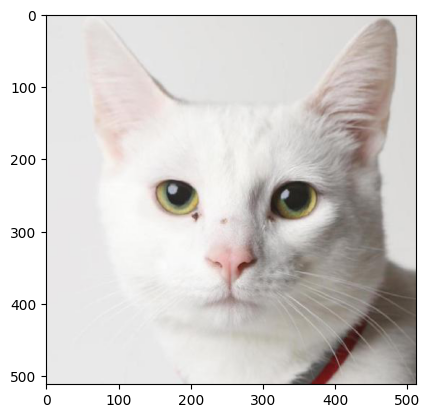

In [ ]:
# read image from path and expand dims with axis 0 and store the result in image named variable
image = np.expand_dims(plt.imread(image_path), axis=0)
# plot the image using plt.imshow()
plt.imshow(image[0])

In [ ]:
# set train data path in a variable named train_path
train_path = '/content/afhq/train'
print(train_path)

/content/afhq/train


In [ ]:
''' 
create a variable with reference to ImageDataGenerator with following parameters:
gen = ImageDataGenerator(
    rotation_range= integer value, 
    width_shift_range= float value, 
    height_shift_range= float vaue,
    zoom_range= float value, 
    channel_shift_range= integer, 
    brightness_range=  [min smaller than 1, max grater than 1],
    horizontal_flip= boolean,
    vertical_flip= boolean)
'''
gen = ImageDataGenerator(
    rotation_range= 30, 
    width_shift_range= 0.3, 
    height_shift_range= 0.3,
    zoom_range= 0.2, 
    channel_shift_range= 15, 
    brightness_range=  [0.5,1.0],
    horizontal_flip= True,
    vertical_flip= True)


# image size variable named IMAGE_SIZE with size value
IMAGE_SIZE = 224
# batch size variable named BATCH_SIZE with size value
BATCH_SIZE = 32



# Using flow_from_directory function

1. The directory must be set to the path where your 'n' classes of folders are present.
2. The target_size is the size of your input images, every image will be resized to this size.
3. color_mode: if the image is either black and white or grayscale set 'grayscale' or if the image has three color channels, set 'rgb'.
4. batch_size: No. of images to be yielded from the generator per batch.
5. class_mode: Set 'binary' if you have only two classes to predict, if not set to'categorical'. in case if you're developing an Autoencoder system, both input and the output would probably be the same image, for this case set to 'input'.
6. shuffle: Set True if you want to shuffle the order of the image that is being yielded, else set False.
7. seed: Random seed for applying random image augmentation and shuffling the order of the image.

# Train generator

Using ImageDatagenerator function flow_from_directory on training data directory we can generate training data with data augmentation.

In [ ]:
'''create a variable with reference to ImageDataGenerator with following parameters:
train_generator = gen.flow_from_directory(
    train_path, 
    target_size=(IMAGE_SIZE,IMAGE_SIZE), 
    subset='training',
    batch_size= BATCH_SIZE,
    color_mode = 'rgb',
    shuffle=boolean,
    class_mode=  'categorical' or 'binary',
    seed= integer value)
'''

train_generator = gen.flow_from_directory(
    train_path, 
    target_size=(IMAGE_SIZE,IMAGE_SIZE), 
    subset='training',
    batch_size= BATCH_SIZE,
    color_mode = 'rgb',
    shuffle=True,
    class_mode=  'categorical',
    seed= 42)


Found 14630 images belonging to 3 classes.


# ploting the generated images above flow_from_directory method

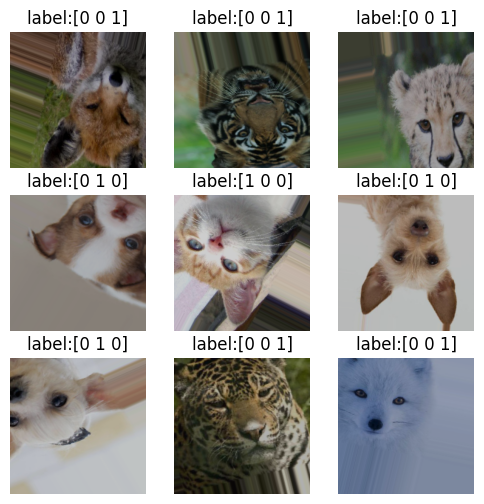

In [ ]:
# create two variables x,y which will store values returned by train_generator.next() 
x, y = train_generator.next()

# create figure
fig = plt.figure(figsize=(6,6))

# create loop in range 9 or your choice
for i in range(9):
  # add a subplot to figure of size you want
  fig.add_subplot(3,3, i+1)
  # create a image named variable to store ith value of x astype np.uint8
  image = x[i].astype(np.uint8)
  # create a label named variable to store ith value of y astype np.uint8
  label = y[i].astype(np.uint8)
  # plot the image using imshow
  plt.imshow(image)
  # add the title as actual label to image
  plt.title(f'label:{str(label)}')
  plt.axis('off')
# show the image
plt.show()

In [ ]:
# set train data path in a variable named train_path
train_path = '/content/afhq/train'

# set valid data path in a variable named valid_path
valid_path = '/content/afhq/val'

# Valid generator

Using ImageDatagenerator function flow_from_directory on training data directory we can generate training data with data augmentation.

In [ ]:

'''create a variable with reference to ImageDataGenerator with following parameters:

valid_generator = gen.flow_from_directory(
valid_path, 
target_size=(IMAGE_SIZE,IMAGE_SIZE),
shuffle= boolean,
class_mode='categorical' or 'binary')
'''
valid_generator = gen.flow_from_directory(
valid_path, 
target_size=(IMAGE_SIZE,IMAGE_SIZE),
shuffle= True,
class_mode='categorical')


Found 1500 images belonging to 3 classes.


# Building model

# To train faster we will be using Transer Learning with

## MobileNetV2 Model

MobileNet is a CNN architecture model for Image Classification and Mobile Vision. As compared to other models, running or applying transfer learning using  MobileNet consumes very less omputation power. Thus it can be used on devices such as Mobile devices, embedded systems and computers wthout GPU or low specification.
It runs well on browser as browser have computational limitation.


In [ ]:
# create a variable name base_model with MobileNetV2 model from tensorflow application library
# weight: imagnet
# input shape : 224,224,3
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top = False
)


# set base modle trainable to False
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# create a variable and store number of classes i.e 3 classes in this case
number_of_classes = 3

In [ ]:
# define inputs using tensorflow Input --> 224,224,3
inputs = tf.keras.Input(shape=(224, 224, 3))

# set the inputs to base_model
x = base_model(inputs, training = False)

# Add GlobalAveragePooling2D layer to base_model
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# define initializer for modle i.e GlorotUniform for uniform distribution of tensor data
initializer = tf.keras.initializers.GlorotUniform(seed = 42)

# create a variabel to store activation, use any sigmoid, softmax (softmax recommended)
activation = 'softmax'

# Define a Dense layer
outputs = tf.keras.layers.Dense(number_of_classes, kernel_initializer=initializer, activation= activation)(x)

# Create a model using the layers created
model = tf.keras.Model(inputs, outputs)

# Note:
The last layer has 10 number of classes unit. So the output(predicted labels) will be 10 floating points as the actual label is a single integer number.

For the last layer, the activation function can be: 
1. None
2. sigmoid
3. softmax

When there is no activation function used inthe model's last layer, we need to set from_logits=True in cross-entropy loss function during compiling model. This loss function will apply sigmoid transformation on predicted label values

### Let's see the model summary

In [ ]:
# visualize modle summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


## Compile the model

Compile the model before training it. Since there are 3 classes, use the tf.keras.losses.CategoricalCrossEntropy() loss with from_logits=True (if activation function is not mentioned while creating model)

In [ ]:
# Compile the model by passing loss, optimizer and metrics

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = tf.keras.metrics.categorical_accuracy
              )


# How fit_generator works exactly?

In the background, keras fit_generaor uses following process on the data while training a model:
  1. Kera calls the genrator function passed to fit_generator i.e gen.flow_from_directory in our case.
  2. The generator returns the batch of size mentioned while generating image to the fit_generator.
  3. The .fit_generator function accepts teh batch of image data, perform backpropagation and updates teh weights in our model.
  4. This process is repeated until we have reached the desired number of epochs.

## Why do we need steps_per_epoch?

The keras data genrator is meant to loop infinitely i.e it should never return or exit.

Since the function is intended to loop infinitely, Keras has no ability to determine when one epoch starts and a new epoch begins.

Therefore, we compute the steps_per_epoch
value as the total number of training data points divided by the batch size. Once Keras hits this step count it knows that it's a new epoch.


In [ ]:

# create a variable name step_size_train and set value as train_generator.n// train_generator.batch_size
STEP_SIZE_TRAIN = train_generator.n// train_generator.batch_size

# create a variable name step_size_valid and set value as valid_generator.n// train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n// train_generator.batch_size


''' fit modle using fit_generator function by passing following paarameters:
    model.fit_generator(generator = train_generator,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=5)
'''
model.fit_generator(generator = train_generator,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=5)



<ipython-input-24-1781922afd50>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator = train_generator,


Epoch 1/5
457/457 [==============================] - 302s 635ms/step - loss: 0.8439 - categorical_accuracy: 0.6154 - val_loss: 0.7691 - val_categorical_accuracy: 0.6576
Epoch 2/5
457/457 [==============================] - 303s 663ms/step - loss: 0.7394 - categorical_accuracy: 0.6786 - val_loss: 0.7799 - val_categorical_accuracy: 0.6630
Epoch 3/5
457/457 [==============================] - 287s 628ms/step - loss: 0.6977 - categorical_accuracy: 0.7011 - val_loss: 0.7198 - val_categorical_accuracy: 0.6963
Epoch 4/5
457/457 [==============================] - 301s 660ms/step - loss: 0.6876 - categorical_accuracy: 0.7067 - val_loss: 0.7335 - val_categorical_accuracy: 0.6821
Epoch 5/5
457/457 [==============================] - 310s 678ms/step - loss: 0.6780 - categorical_accuracy: 0.7103 - val_loss: 0.6765 - val_categorical_accuracy: 0.7058


# Summary

In this assignement you learned the differences between Keras fit and fitgenerator functions used to train a deep neural network.

.fit is used when there is no need for data augmentation and teh whole data can be used to fit in memory.

Whereas, 
.fit_generator should be used when data augmenetation to be applied or data is too large to store in memory or whenever there is need for converting image dataset in to baches of images

![link text](http://recyclefloridatoday.org/wp-content/uploads/2020/07/Congratulations-1.jpg)

# Please fill the below feedback form about this assignment

https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s